# Dataset for Interns
## Objective:
### To analyze the skill sets of each candidate (Using Logistic Regression) and predict if a candidate will be selected or not based on those skills.

## Loading the data and other imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import random  
import string  
import re

In [2]:
df=pd.read_excel (r'C:\Users\stuti\Downloads\Dataset for Interns.xlsx')

In [3]:
df.head()

,Candidates_001,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,First Name,Career Page Invite Status,City,State/Province,Zip/Postal Code,Experience in Years,Current Employer,Current Job Title,Skill Set,Opt-In Status,Opt-In Mode,Opt-In Date,I Agree,Highest Qualification Held,Created Time,Modified Time,Source,Email Opt Out,Is Hot Candidate,Candidate Status,Willing to work on Contract (min 3 months),LinkedIn Profile,Willing to work on Contract?,Gender
1,Sukhmani,Invited,Chandrapur,Maharashtra,442401,1,NaN,NaN,NaN,Opt-In Provided,Webform,12/07/2020,True,M.B.A,12/07/2020 11:28 AM,12/07/2020 11:28 AM,CareerSite,False,False,Associated,False,NaN,NaN,Female
2,Abhishek,To-be-invited,DDD,DDD,NaN,12,asdadsdsa,NaN,adsadaasda,Opt-In Provided,Webform,04/07/2020,True,M.C.A.,05/07/2020 05:13 AM,05/07/2020 05:13 AM,CareerSite,False,False,New,False,NaN,6-9 Months,Female
3,Parul,Invited,Jaipur,Rajasthan,302006,1,NaN,NaN,NaN,Opt-In Provided,Webform,28/06/2020,True,B.E.,28/06/2020 11:15 PM,28/06/2020 11:15 PM,CareerSite,False,False,Associated,False,https://www.linkedin.com/in/parul-shrivastava-...,NaN,Female
4,Arnab,Invited,Bengaluru,Karnataka,560078,0,NaN,NaN,NaN,Opt-In Provided,Others,26/06/2020,True,B.E.,27/06/2020 01:13 AM,27/06/2020 01:20 AM,CareerSite,False,False,Associated,False,NaN,NaN,Male


## Renaming the columns

In [4]:
df.rename( columns={'Unnamed: 1':'Career Page Invite Status'}, inplace=True )
df.rename( columns={'Unnamed: 2':'City'}, inplace=True )
df.rename( columns={'Unnamed: 3':'State/Province'}, inplace=True )
df.rename( columns={'Unnamed: 4':'Zip/Postal Code'}, inplace=True )
df.rename( columns={'Unnamed: 5':'Experience in Years'}, inplace=True )
df.rename( columns={'Unnamed: 6':'Current Employer'}, inplace=True )
df.rename( columns={'Unnamed: 7':'Current Job Title'}, inplace=True )
df.rename( columns={'Unnamed: 8':'Skill Set'}, inplace=True )
df.rename( columns={'Unnamed: 9':'Opt-In Status'}, inplace=True )
df.rename( columns={'Unnamed: 10':'Opt-In Mode'}, inplace=True )
df.rename( columns={'Unnamed: 11':'Opt-In Date'}, inplace=True )
df.rename( columns={'Unnamed: 12':'I Agree'}, inplace=True )
df.rename( columns={'Unnamed: 13':'Highest Qualification Held'}, inplace=True )
df.rename( columns={'Unnamed: 14':'Created Time'}, inplace=True )
df.rename( columns={'Unnamed: 15':'Modified Time'}, inplace=True )
df.rename( columns={'Unnamed: 16':'Source'}, inplace=True )
df.rename( columns={'Unnamed: 17':'Email Opt Out'}, inplace=True )
df.rename( columns={'Unnamed: 18':'Is Hot Candidate'}, inplace=True )
df.rename( columns={'Unnamed: 19':'Candidate Status'}, inplace=True )
df.rename( columns={'Unnamed: 20':'Willing to work on Contract (min 3 months)'}, inplace=True )
df.rename( columns={'Unnamed: 21':'LinkedIn Profile'}, inplace=True )
df.rename( columns={'Unnamed: 22':'Willing to work on Contract?'}, inplace=True )
df.rename( columns={'Unnamed: 23':'Gender'}, inplace=True )
df.drop(df.index[0],inplace=True)
df.head()

,Candidates_001,Career Page Invite Status,City,State/Province,Zip/Postal Code,Experience in Years,Current Employer,Current Job Title,Skill Set,Opt-In Status,Opt-In Mode,Opt-In Date,I Agree,Highest Qualification Held,Created Time,Modified Time,Source,Email Opt Out,Is Hot Candidate,Candidate Status,Willing to work on Contract (min 3 months),LinkedIn Profile,Willing to work on Contract?,Gender
1,Sukhmani,Invited,Chandrapur,Maharashtra,442401,1,NaN,NaN,NaN,Opt-In Provided,Webform,12/07/2020,True,M.B.A,12/07/2020 11:28 AM,12/07/2020 11:28 AM,CareerSite,False,False,Associated,False,NaN,NaN,Female
2,Abhishek,To-be-invited,DDD,DDD,NaN,12,asdadsdsa,NaN,adsadaasda,Opt-In Provided,Webform,04/07/2020,True,M.C.A.,05/07/2020 05:13 AM,05/07/2020 05:13 AM,CareerSite,False,False,New,False,NaN,6-9 Months,Female
3,Parul,Invited,Jaipur,Rajasthan,302006,1,NaN,NaN,NaN,Opt-In Provided,Webform,28/06/2020,True,B.E.,28/06/2020 11:15 PM,28/06/2020 11:15 PM,CareerSite,False,False,Associated,False,https://www.linkedin.com/in/parul-shrivastava-...,NaN,Female
4,Arnab,Invited,Bengaluru,Karnataka,560078,0,NaN,NaN,NaN,Opt-In Provided,Others,26/06/2020,True,B.E.,27/06/2020 01:13 AM,27/06/2020 01:20 AM,CareerSite,False,False,Associated,False,NaN,NaN,Male
5,Noleeka,Enabled,"Dist, Betul, Betul","Madhya Pradesh, Madhya Pradesh",460449,0,NaN,NaN,"continuous development, C Programming Language...",Opt-In not requested,NaN,25/06/2020,False,Bachelor of Engineering,25/06/2020 04:19 PM,25/06/2020 04:19 PM,CareerSite,False,False,New,False,NaN,< 3 Months,Female


### Just keeping the 'skill set' (mentions the skills of the candidate) and 'opt-in' (mentions if the candidate was selected or not) columns to do a dedicated analysis of skills 

In [5]:
df.drop(df.columns.difference(['Skill Set','Opt-In Status']),1, inplace=True)

### Dropping rows with NaN entries

In [6]:
df.dropna(inplace=True)

### Visualizing the length of each skill entry

In [7]:
length = df['Skill Set'].apply(len)
length

2        10
5       165
6       133
7        38
8       929
9       549
10      216
11      110
16      233
18       30
19      282
21      251
23      133
28      693
37      138
40      299
43      371
45      346
47      585
52      322
67      255
71       49
72      411
73     1031
75       77
77       33
81       15
85       71
86        8
89      157
91       94
92      295
93      406
95        8
97       72
99     1059
100      10
101     355
107      35
113      27
114      24
117     279
119      72
130     511
131      86
143      91
144      49
146     156
147      34
149     290
151      17
154     161
155     114
157      96
158     193
159     200
162     634
168      11
169     316
170     337
173     131
174     209
176      99
177      61
178     242
182      87
184     416
187     601
188     139
189     358
191     418
195     262
198     537
199      87
201     552
203      39
205     285
206     469
207     469
218     300
219     373
222     466
223     886
224 

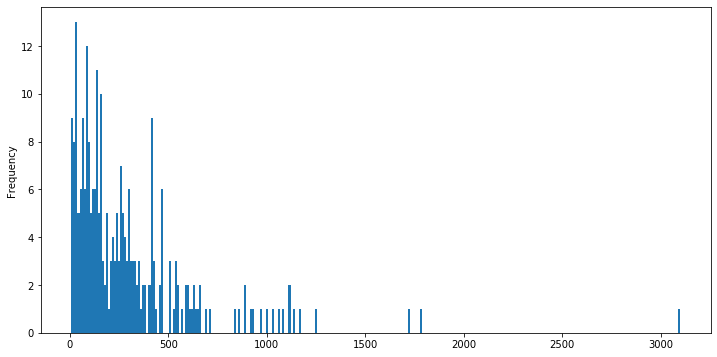

In [8]:
plt.figure(figsize=(12,6))
length.plot(bins=300, kind='hist') 

### Dropping the outlier

In [6]:
df.drop(index=608, inplace=True)

In [7]:
df

,Skill Set,Opt-In Status
2,adsadaasda,Opt-In Provided
5,"continuous development, C Programming Language...",Opt-In not requested
6,"self development, technical and innovative ski...",Opt-In not requested
7,"HTML, Machine Learning, MySQL, \nPython",Opt-In not requested
8,"Container orchestration management, Good time ...",Opt-In Provided
9,"User Experience, taking client, Project Estima...",Opt-In not requested
10,"Requirements Analysis, Good Management skills,...",Opt-In Provided
11,"LinkedIn, IBM Hardware, Microsoft Excel, Micro...",Opt-In not requested
16,"Digital Marketing (SEO, Social Media Marketing...",Opt-In Provided
18,"node.js,Express.js,MySQL,Mongo",Opt-In Provided


### Converting 'skill set' entries to string type

In [8]:
df["Skill Set"]= df["Skill Set"].astype(str,errors='raise') 

In [9]:
len(df['Skill Set'])

257

### Setting the new index

In [10]:
index_list = list(range(1, 258))
print(index_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [11]:
df.set_index([index_list],inplace=True)
df

,Skill Set,Opt-In Status
1,adsadaasda,Opt-In Provided
2,"continuous development, C Programming Language...",Opt-In not requested
3,"self development, technical and innovative ski...",Opt-In not requested
4,"HTML, Machine Learning, MySQL, \nPython",Opt-In not requested
5,"Container orchestration management, Good time ...",Opt-In Provided
6,"User Experience, taking client, Project Estima...",Opt-In not requested
7,"Requirements Analysis, Good Management skills,...",Opt-In Provided
8,"LinkedIn, IBM Hardware, Microsoft Excel, Micro...",Opt-In not requested
9,"Digital Marketing (SEO, Social Media Marketing...",Opt-In Provided
10,"node.js,Express.js,MySQL,Mongo",Opt-In Provided


### Creating a list - 'skill_list' storing skills from each row

In [12]:
split_func=lambda x: x.split(',')

In [13]:
skill_list=df['Skill Set'].apply(split_func).tolist()

### converting the multi-dimensional 'skill_list' to single dimension

In [14]:
from itertools import chain 
flatten_list = list(chain.from_iterable(skill_list))

In [15]:
print(flatten_list)

['adsadaasda', 'continuous development', ' C Programming Language', ' C++', ' Cascading Style Sheets', ' Databases', ' HTML', ' JavaScript', ' MySQL', ' Web Application Development', ' English', ' Indian > Hindi', 'self development', ' technical and innovative skills', ' C++', ' DBMS', ' Java', ' Java 2', ' Microsoft Office', ' English', ' Indian > Hindi', ' Indian > Tamil', 'HTML', ' Machine Learning', ' MySQL', ' \nPython', 'Container orchestration management', ' Good time management', ' Juspay monitoring', ' Lntinfotech monitoring', ' service maintenance', ' Firewalls', ' IP Networks', ' Load Balancing', ' TCP/IP', ' Amazon DynamoDB', ' Amazon Web Services', ' Android', ' Ansible', ' Artificial Intelligence', ' Bash Shell', ' C Programming Language', ' C++', ' Cascading Style Sheets', ' Cisco Switches/Routers', ' Cloud Computing', ' Confluence', ' Data Structure', ' Databases', ' Debugging', ' Deep Learning', ' DevOps', ' Docker', ' Eclipse IDE', ' Git', ' HTML', ' Hadoop', ' IBM OS

### Extracting all the unique skill values from 'flatten_list' to 'unique_skills'

In [16]:
unique_skills=list(set(flatten_list))
unique_skills

['',
 ' Networking',
 ' English',
 ' S&OP',
 ' troubleshooting skills',
 ' Web Services',
 ' French',
 ' Bulk processing',
 ' final implementation',
 ' Shared Service Centre',
 ' Cashbook',
 ' managed all technical issues',
 ' Annual Returns',
 ' Pay Negotiations',
 ' Monthly profitability analysis',
 ' Social Media Marketing)',
 ' development experience',
 ' Indian > Malayalam',
 ' External Audit',
 ' delivering Sales',
 ' Public Relations',
 ' Production support',
 ' develop business solution',
 ' c++',
 'Marketing Management',
 'Analytical Skills',
 ' broad skills',
 ' Software Development Life Cycle',
 ' Billing',
 ' Account Management',
 ' Retail Management',
 ' Google Drive',
 ' Omniture',
 ' Content Management',
 ' strong presentation skills',
 'continuous development',
 ' JUnit',
 ' relationship management',
 ' good presentation skills',
 'Digital Transformation',
 '  microcontroller',
 'HTML',
 ' Sourcing Candidates',
 ' Logic skills',
 ' Salesforce Data Loader',
 'Affiliate M

In [17]:
len(unique_skills)

1825

### Making dictionary 'skill_freq' to store the frequency of occurence of each skill in the dataset

In [19]:
skill_freq = dict()
for skills in flatten_list:
    if skills in skill_freq:
        skill_freq[skills] += 1
    else:
        skill_freq[skills] = 1
print(skill_freq) 
print(len(skill_freq))

{'adsadaasda': 1, 'continuous development': 1, ' C Programming Language': 34, ' C++': 33, ' Cascading Style Sheets': 24, ' Databases': 23, ' HTML': 45, ' JavaScript': 35, ' MySQL': 28, ' Web Application Development': 9, ' English': 79, ' Indian > Hindi': 72, 'self development': 1, ' technical and innovative skills': 1, ' DBMS': 5, ' Java': 42, ' Java 2': 6, ' Microsoft Office': 49, ' Indian > Tamil': 10, 'HTML': 3, ' Machine Learning': 11, ' \nPython': 1, 'Container orchestration management': 1, ' Good time management': 1, ' Juspay monitoring': 1, ' Lntinfotech monitoring': 1, ' service maintenance': 1, ' Firewalls': 1, ' IP Networks': 1, ' Load Balancing': 1, ' TCP/IP': 1, ' Amazon DynamoDB': 1, ' Amazon Web Services': 7, ' Android': 10, ' Ansible': 2, ' Artificial Intelligence': 6, ' Bash Shell': 1, ' Cisco Switches/Routers': 3, ' Cloud Computing': 5, ' Confluence': 2, ' Data Structure': 1, ' Debugging': 5, ' Deep Learning': 3, ' DevOps': 4, ' Docker': 1, ' Eclipse IDE': 6, ' Git': 5

### Finding the most an least occured skill

In [20]:
most_skill = max(skill_freq, key=skill_freq.get) 
print(most_skill) 

 English


In [21]:
least_skill = min(skill_freq, key=skill_freq.get) 
print(least_skill) 

adsadaasda


### Sorting the dictionary

In [22]:
import operator
import collections
sorted_x = sorted(skill_freq.items(), key=operator.itemgetter(1), reverse=True)
sorted_dict = collections.OrderedDict(sorted_x)
sorted_dict

OrderedDict([(' English', 79),
             (' Indian > Hindi', 72),
             (' Microsoft Office', 49),
             (' Microsoft Excel', 49),
             (' HTML', 45),
             (' Java', 42),
             (' Python Programming', 38),
             (' SQL', 37),
             (' Microsoft Word', 36),
             (' JavaScript', 35),
             (' C Programming Language', 34),
             (' C++', 33),
             (' Microsoft PowerPoint', 32),
             (' MySQL', 28),
             (' Cascading Style Sheets', 24),
             (' Microsoft Windows', 24),
             (' Databases', 23),
             (' Teamwork', 22),
             (' Social Media', 20),
             (' Managerial Skills > Team Management', 20),
             (' eCommerce', 18),
             (' Project Management', 18),
             (' Audit', 18),
             (' Linux', 17),
             (' Operating Systems', 17),
             (' Sales', 17),
             (' Indian > Marathi', 16),
             (' Ado

In [23]:
optimised_skill_freq= {i:skill_freq[i] for i in skill_freq if skill_freq[i]>6}
sorted_x2 = sorted(optimised_skill_freq.items(), key=operator.itemgetter(1), reverse=True)
ordered_opt_skill_freq = collections.OrderedDict(sorted_x2)
ordered_opt_skill_freq

OrderedDict([(' English', 79),
             (' Indian > Hindi', 72),
             (' Microsoft Office', 49),
             (' Microsoft Excel', 49),
             (' HTML', 45),
             (' Java', 42),
             (' Python Programming', 38),
             (' SQL', 37),
             (' Microsoft Word', 36),
             (' JavaScript', 35),
             (' C Programming Language', 34),
             (' C++', 33),
             (' Microsoft PowerPoint', 32),
             (' MySQL', 28),
             (' Cascading Style Sheets', 24),
             (' Microsoft Windows', 24),
             (' Databases', 23),
             (' Teamwork', 22),
             (' Social Media', 20),
             (' Managerial Skills > Team Management', 20),
             (' eCommerce', 18),
             (' Project Management', 18),
             (' Audit', 18),
             (' Linux', 17),
             (' Operating Systems', 17),
             (' Sales', 17),
             (' Indian > Marathi', 16),
             (' Ado

In [24]:
len(ordered_opt_skill_freq)

102

### Count plot of each skill

<BarContainer object of 102 artists>

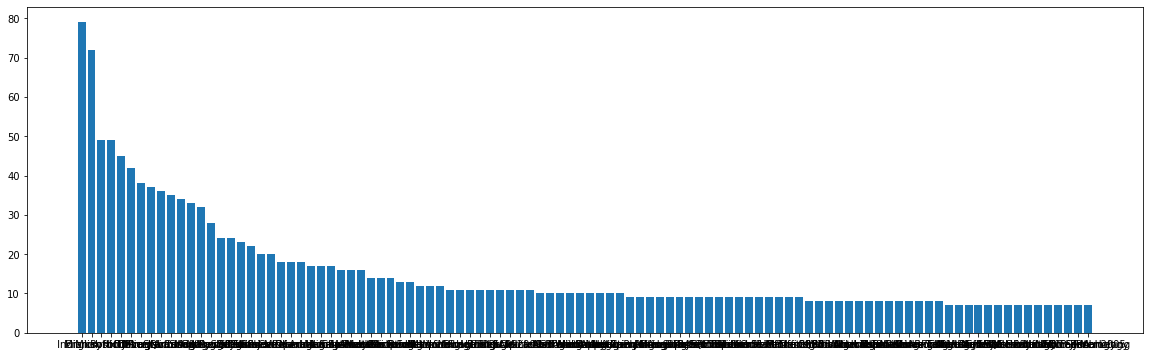

In [25]:
plt.figure(figsize=(20,6))
plt.bar(ordered_opt_skill_freq.keys(),ordered_opt_skill_freq.values())

### Converting the sorted dictionary to list

In [26]:
import heapq
most_freq_skill_list = heapq.nlargest(165, ordered_opt_skill_freq, key=ordered_opt_skill_freq.get)
most_freq_skill_list

[' English',
 ' Indian > Hindi',
 ' Microsoft Office',
 ' Microsoft Excel',
 ' HTML',
 ' Java',
 ' Python Programming',
 ' SQL',
 ' Microsoft Word',
 ' JavaScript',
 ' C Programming Language',
 ' C++',
 ' Microsoft PowerPoint',
 ' MySQL',
 ' Cascading Style Sheets',
 ' Microsoft Windows',
 ' Databases',
 ' Teamwork',
 ' Social Media',
 ' Managerial Skills > Team Management',
 ' eCommerce',
 ' Project Management',
 ' Audit',
 ' Linux',
 ' Operating Systems',
 ' Sales',
 ' Indian > Marathi',
 ' Adobe Photoshop',
 ' Analytics',
 ' Market Research',
 ' Problem Solving',
 ' Back End',
 ' Oracle',
 ' Customer Relationship Management',
 ' Microsoft Windows 7',
 ' eMarketing',
 ' Budgets & Budgeting',
 ' Machine Learning',
 ' Personal Home Page',
 ' Front End',
 ' HTML5',
 ' Bootstrap',
 ' SAP',
 ' Oracle 2000',
 ' Oracle 7',
 ' Oracle 9',
 ' Indian > Tamil',
 ' Android',
 ' Microsoft Windows XP',
 ' Self-motivated',
 ' Google Analytics',
 ' Marketing Management',
 ' LinkedIn',
 ' Marketing Ca

In [27]:
most_freq_skill_list[4]

' HTML'

### Creating new data frame 'newdf' containg each skill as a column along with 'Skill Set' & 'Opt-In Status' columns from df 

In [30]:
newdf = pd.DataFrame( columns =most_freq_skill_list)

In [31]:
df.head()

,Skill Set,Opt-In Status
1,adsadaasda,Opt-In Provided
2,"continuous development, C Programming Language...",Opt-In not requested
3,"self development, technical and innovative ski...",Opt-In not requested
4,"HTML, Machine Learning, MySQL, \nPython",Opt-In not requested
5,"Container orchestration management, Good time ...",Opt-In Provided


In [32]:
opt_in_list=df['Opt-In Status'].tolist()
opt_in_list

['Opt-In Provided',
 'Opt-In not requested',
 'Opt-In not requested',
 'Opt-In not requested',
 'Opt-In Provided',
 'Opt-In not requested',
 'Opt-In Provided',
 'Opt-In not requested',
 'Opt-In Provided',
 'Opt-In Provided',
 'Opt-In not requested',
 'Opt-In not requested',
 'Opt-In not requested',
 'Opt-In Provided',
 'Opt-In not requested',
 'Opt-In Provided',
 'Opt-In Provided',
 'Opt-In not requested',
 'Opt-In Provided',
 'Opt-In not requested',
 'Opt-In not requested',
 'Opt-In not requested',
 'Opt-In not requested',
 'Opt-In not requested',
 'Opt-In Provided',
 'Opt-In Provided',
 'Opt-In not requested',
 'Opt-In not requested',
 'Opt-In Provided',
 'Opt-In Provided',
 'Opt-In not requested',
 'Opt-In not requested',
 'Opt-In not requested',
 'Opt-In Provided',
 'Opt-In not requested',
 'Opt-In not requested',
 'Opt-In Provided',
 'Opt-In not requested',
 'Opt-In Provided',
 'Opt-In Provided',
 'Opt-In Provided',
 'Opt-In not requested',
 'Opt-In Provided',
 'Opt-In not request

In [33]:
newdf

,English,Indian > Hindi,Microsoft Office,Microsoft Excel,HTML,Java,Python Programming,SQL,Microsoft Word,JavaScript,C Programming Language,C++,Microsoft PowerPoint,MySQL,Cascading Style Sheets,Microsoft Windows,Databases,Teamwork,Social Media,Managerial Skills > Team Management,eCommerce,Project Management,Audit,Linux,Operating Systems,Sales,Indian > Marathi,Adobe Photoshop,Analytics,Market Research,Problem Solving,Back End,Oracle,Customer Relationship Management,Microsoft Windows 7,eMarketing,Budgets & Budgeting,Machine Learning,Personal Home Page,Front End,HTML5,Bootstrap,SAP,Oracle 2000,Oracle 7,Oracle 9,Indian > Tamil,Android,Microsoft Windows XP,Self-motivated,Google Analytics,Marketing Management,LinkedIn,Marketing Campaigns,Strategic Planning,Web Application Development,Interpersonal Skills,Pricing,Invoicing > Issuing Invoices,AngularJS,Microsoft ASP.NET,Microsoft SQL Server,Facebook,Reconciliations,Process Improvement,Taxation,Oracle 11i,Oracle 6,Oracle 8,Microsoft Office 2007,Microsoft Office 365,Marketing,Financial Statements/Financial Reports,CSS3,Microsoft Windows 10,Microsoft Windows 8,Hard-Working,Product Launch,Algorithms,Internal Audit,Microsoft C-SHARP,Forecasting,Hard-Working,Salesforce.com,Indian > Telugu,Sales Targets,Return on Investment,Amazon Web Services,IBM OS/2,Corel Draw Suite,Node.js,SDLC,Microsoft SQL Server 2008,Agile Methodology,Management Information System,Payroll,Matlab,Microsoft .NET Technology,Microsoft SQL Server 2005,Information Technology,JIRA,Email Marketing


In [34]:
newdf['Final Status']=opt_in_list

In [35]:
newdf.head()

,English,Indian > Hindi,Microsoft Office,Microsoft Excel,HTML,Java,Python Programming,SQL,Microsoft Word,JavaScript,C Programming Language,C++,Microsoft PowerPoint,MySQL,Cascading Style Sheets,Microsoft Windows,Databases,Teamwork,Social Media,Managerial Skills > Team Management,eCommerce,Project Management,Audit,Linux,Operating Systems,Sales,Indian > Marathi,Adobe Photoshop,Analytics,Market Research,Problem Solving,Back End,Oracle,Customer Relationship Management,Microsoft Windows 7,eMarketing,Budgets & Budgeting,Machine Learning,Personal Home Page,Front End,HTML5,Bootstrap,SAP,Oracle 2000,Oracle 7,Oracle 9,Indian > Tamil,Android,Microsoft Windows XP,Self-motivated,Google Analytics,Marketing Management,LinkedIn,Marketing Campaigns,Strategic Planning,Web Application Development,Interpersonal Skills,Pricing,Invoicing > Issuing Invoices,AngularJS,Microsoft ASP.NET,Microsoft SQL Server,Facebook,Reconciliations,Process Improvement,Taxation,Oracle 11i,Oracle 6,Oracle 8,Microsoft Office 2007,Microsoft Office 365,Marketing,Financial Statements/Financial Reports,CSS3,Microsoft Windows 10,Microsoft Windows 8,Hard-Working,Product Launch,Algorithms,Internal Audit,Microsoft C-SHARP,Forecasting,Hard-Working,Salesforce.com,Indian > Telugu,Sales Targets,Return on Investment,Amazon Web Services,IBM OS/2,Corel Draw Suite,Node.js,SDLC,Microsoft SQL Server 2008,Agile Methodology,Management Information System,Payroll,Matlab,Microsoft .NET Technology,Microsoft SQL Server 2005,Information Technology,JIRA,Email Marketing,Final Status
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Opt-In Provided
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Opt-In not requested
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Opt-In not requested
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Opt-In not requested
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Opt-In Provided


In [36]:
s_list=df['Skill Set'].tolist()

In [37]:
newdf['Skill Set']=s_list

In [38]:
newdf.head()

,English,Indian > Hindi,Microsoft Office,Microsoft Excel,HTML,Java,Python Programming,SQL,Microsoft Word,JavaScript,C Programming Language,C++,Microsoft PowerPoint,MySQL,Cascading Style Sheets,Microsoft Windows,Databases,Teamwork,Social Media,Managerial Skills > Team Management,eCommerce,Project Management,Audit,Linux,Operating Systems,Sales,Indian > Marathi,Adobe Photoshop,Analytics,Market Research,Problem Solving,Back End,Oracle,Customer Relationship Management,Microsoft Windows 7,eMarketing,Budgets & Budgeting,Machine Learning,Personal Home Page,Front End,HTML5,Bootstrap,SAP,Oracle 2000,Oracle 7,Oracle 9,Indian > Tamil,Android,Microsoft Windows XP,Self-motivated,Google Analytics,Marketing Management,LinkedIn,Marketing Campaigns,Strategic Planning,Web Application Development,Interpersonal Skills,Pricing,Invoicing > Issuing Invoices,AngularJS,Microsoft ASP.NET,Microsoft SQL Server,Facebook,Reconciliations,Process Improvement,Taxation,Oracle 11i,Oracle 6,Oracle 8,Microsoft Office 2007,Microsoft Office 365,Marketing,Financial Statements/Financial Reports,CSS3,Microsoft Windows 10,Microsoft Windows 8,Hard-Working,Product Launch,Algorithms,Internal Audit,Microsoft C-SHARP,Forecasting,Hard-Working,Salesforce.com,Indian > Telugu,Sales Targets,Return on Investment,Amazon Web Services,IBM OS/2,Corel Draw Suite,Node.js,SDLC,Microsoft SQL Server 2008,Agile Methodology,Management Information System,Payroll,Matlab,Microsoft .NET Technology,Microsoft SQL Server 2005,Information Technology,JIRA,Email Marketing,Final Status,Skill Set
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Opt-In Provided,adsadaasda
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Opt-In not requested,"continuous development, C Programming Language..."
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Opt-In not requested,"self development, technical and innovative ski..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Opt-In not requested,"HTML, Machine Learning, MySQL, \nPython"
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Opt-In Provided,"Container orchestration management, Good time ..."


### Replacing NaN values with zero

In [39]:
newdf.fillna(0)

,English,Indian > Hindi,Microsoft Office,Microsoft Excel,HTML,Java,Python Programming,SQL,Microsoft Word,JavaScript,C Programming Language,C++,Microsoft PowerPoint,MySQL,Cascading Style Sheets,Microsoft Windows,Databases,Teamwork,Social Media,Managerial Skills > Team Management,eCommerce,Project Management,Audit,Linux,Operating Systems,Sales,Indian > Marathi,Adobe Photoshop,Analytics,Market Research,Problem Solving,Back End,Oracle,Customer Relationship Management,Microsoft Windows 7,eMarketing,Budgets & Budgeting,Machine Learning,Personal Home Page,Front End,HTML5,Bootstrap,SAP,Oracle 2000,Oracle 7,Oracle 9,Indian > Tamil,Android,Microsoft Windows XP,Self-motivated,Google Analytics,Marketing Management,LinkedIn,Marketing Campaigns,Strategic Planning,Web Application Development,Interpersonal Skills,Pricing,Invoicing > Issuing Invoices,AngularJS,Microsoft ASP.NET,Microsoft SQL Server,Facebook,Reconciliations,Process Improvement,Taxation,Oracle 11i,Oracle 6,Oracle 8,Microsoft Office 2007,Microsoft Office 365,Marketing,Financial Statements/Financial Reports,CSS3,Microsoft Windows 10,Microsoft Windows 8,Hard-Working,Product Launch,Algorithms,Internal Audit,Microsoft C-SHARP,Forecasting,Hard-Working,Salesforce.com,Indian > Telugu,Sales Targets,Return on Investment,Amazon Web Services,IBM OS/2,Corel Draw Suite,Node.js,SDLC,Microsoft SQL Server 2008,Agile Methodology,Management Information System,Payroll,Matlab,Microsoft .NET Technology,Microsoft SQL Server 2005,Information Technology,JIRA,Email Marketing,Final Status,Skill Set
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Opt-In Provided,adsadaasda
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Opt-In not requested,"continuous development, C Programming Language..."
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Opt-In not requested,"self development, technical and innovative ski..."
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Opt-In not requested,"HTML, Machine Learning, MySQL, \nPython"
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Opt-In Provided,"Container orchestration management, Good time ..."
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Opt-In not requested,"User Experience, taking client, Project Estima..."
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Opt-In Provided,"Requirements Analysis, Good Management skills,..."
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Opt-In not requested,"LinkedIn, IBM Hardware, Microsoft Excel, Micro..."
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Opt-In Provided,"Digital Marketing (SEO, Social Media Marketing..."
9,0,0,0,0,0,0,

### Placing 1 under each skill column if it is in the 'Skill Set' entry

In [40]:
for i in range(len(most_freq_skill_list)):
    for j in range(len(newdf)):
        if most_freq_skill_list[i] in newdf.iloc[j][103]:
            newdf.iloc[j][i]=1
        else:
            newdf.iloc[j][i]=0
newdf
        
               

,English,Indian > Hindi,Microsoft Office,Microsoft Excel,HTML,Java,Python Programming,SQL,Microsoft Word,JavaScript,C Programming Language,C++,Microsoft PowerPoint,MySQL,Cascading Style Sheets,Microsoft Windows,Databases,Teamwork,Social Media,Managerial Skills > Team Management,eCommerce,Project Management,Audit,Linux,Operating Systems,Sales,Indian > Marathi,Adobe Photoshop,Analytics,Market Research,Problem Solving,Back End,Oracle,Customer Relationship Management,Microsoft Windows 7,eMarketing,Budgets & Budgeting,Machine Learning,Personal Home Page,Front End,HTML5,Bootstrap,SAP,Oracle 2000,Oracle 7,Oracle 9,Indian > Tamil,Android,Microsoft Windows XP,Self-motivated,Google Analytics,Marketing Management,LinkedIn,Marketing Campaigns,Strategic Planning,Web Application Development,Interpersonal Skills,Pricing,Invoicing > Issuing Invoices,AngularJS,Microsoft ASP.NET,Microsoft SQL Server,Facebook,Reconciliations,Process Improvement,Taxation,Oracle 11i,Oracle 6,Oracle 8,Microsoft Office 2007,Microsoft Office 365,Marketing,Financial Statements/Financial Reports,CSS3,Microsoft Windows 10,Microsoft Windows 8,Hard-Working,Product Launch,Algorithms,Internal Audit,Microsoft C-SHARP,Forecasting,Hard-Working,Salesforce.com,Indian > Telugu,Sales Targets,Return on Investment,Amazon Web Services,IBM OS/2,Corel Draw Suite,Node.js,SDLC,Microsoft SQL Server 2008,Agile Methodology,Management Information System,Payroll,Matlab,Microsoft .NET Technology,Microsoft SQL Server 2005,Information Technology,JIRA,Email Marketing,Final Status,Skill Set
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Opt-In Provided,adsadaasda
1,1,1,0,0,1,1,0,0,0,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Opt-In not requested,"continuous development, C Programming Language..."
2,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Opt-In not requested,"self development, technical and innovative ski..."
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Opt-In not requested,"HTML, Machine Learning, MySQL, \nPython"
4,1,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Opt-In Provided,"Container orchestration management, Good time ..."
5,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Opt-In not requested,"User Experience, taking client, Project Estima..."
6,1,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Opt-In Provided,"Requirements Analysis, Good Management skills,..."
7,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Opt-In not requested,"LinkedIn, IBM Hardware, Microsoft Excel, Micro..."
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Opt-In Provided,"Digital Marketing (SEO, Social Media Marketing..."
9,0,0,0,0,0,0,

### Applying Logisti Regression model to predict whether the candidate will be selected or not

In [41]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [46]:
# x=newdf.drop([["Final Status","Skill Set"]],axis=1)
# y=
y=newdf["Final Status"]
x=newdf.drop(["Final Status"],axis=1)
X=x.drop(["Skill Set"],axis=1)

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [50]:
LogModel = LogisticRegression(solver='liblinear')

In [51]:
LogModel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
predictions=LogModel.predict(X_test)

### Classification Report and Confusion Matrix

In [64]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(classification_report(y_test,predictions))

                      precision    recall  f1-score   support

     Opt-In Provided       0.57      0.52      0.55        23
Opt-In not requested       0.81      0.84      0.82        55

            accuracy                           0.74        78
           macro avg       0.69      0.68      0.68        78
        weighted avg       0.74      0.74      0.74        78



In [65]:
print(confusion_matrix(y_test,predictions))

[[12 11]
 [ 9 46]]
